# 株式市場分析

#### 概要
株式市場のパフォーマンス分析とは、株式および全体的な株式市場のパフォーマンスを評価し、情報に基づいた投資判断を行うことです。

データ分析において、株式市場のパフォーマンス分析は、様々なデータ駆動の手法やツールを使用して株式市場データを調査し、解釈することを含みます。
今回は、主に<b>移動平均の計算、ボラティリティの測定、相関分析の実施を行い、</b>株価に影響を与える要因や異なる企業の株価間の関係を深く理解するために株式市場の様々な側面を分析します。

今回は、<b>Yahoo Finance API（yfinance）</b>を使用して過去3か月の株式市場データを収集します。

In [108]:
from IPython.display import display, HTML

# Link to Google Fonts
display(HTML("<link href='https://fonts.googleapis.com/css2?family=Noto+Sans+JP&display=swap' rel='stylesheet'>"))

In [109]:
import pandas as pd
import yfinance as yf
import datetime
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja
import plotly.io as pio

## 1. Yfinance APIから生データを取得する

#### Toyota Motor Corporation (7203.T)

#### Honda Motor Co., Ltd. (7267.T)

#### Subaru Corporation (7270.T)

#### Suzuki Motor Corporation (7269.T)

In [110]:
#stock_code = ["7203.T","7267.T","7270.T","7269.T"]
stock_code = {"7203.T":"TOYOTA","7267.T":"HONDA","7270.T":"SUBARU","7269.T":"SUZUKI"}
df_list = []

過去3か月間の株価データをリストに追加します

In [111]:
for ticker in stock_code:
    data = yf.download(tickers=ticker,period="3mo")
    df_list.append(data)

df_list

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[              Open    High     Low   Close  Adj Close    Volume
 Date                                                           
 2024-05-07  3650.0  3650.0  3562.0  3599.0     3599.0  25496600
 2024-05-08  3547.0  3674.0  3453.0  3579.0     3579.0  68295000
 2024-05-09  3595.0  3595.0  3473.0  3528.0     3528.0  40742400
 2024-05-10  3504.0  3540.0  3386.0  3425.0     3425.0  50941700
 2024-05-13  3417.0  3434.0  3351.0  3366.0     3366.0  30544300
 ...            ...     ...     ...     ...        ...       ...
 2024-07-30  2967.0  3024.0  2944.0  2996.5     2996.5  23232000
 2024-07-31  2929.0  2962.0  2870.5  2949.0     2949.0  46261100
 2024-08-01  2901.0  2912.0  2698.0  2699.0     2699.0  80069400
 2024-08-02  2576.0  2652.0  2538.0  2585.0     2585.0  69193000
 2024-08-05  2450.0  2461.0  2183.0  2232.0     2232.0  83087200
 
 [64 rows x 6 columns],
               Open    High     Low   Close  Adj Close    Volume
 Date                                                           

リストに含まれるデータは各株式の情報を線形に並べているため、pandasのconcatメソッドを使用してDataframeを作成します。

また、Dataframeのindexをリセットします。

In [112]:
stock_df = pd.concat(df_list,keys=stock_code.keys(),names=["Ticker"])
stock_df = stock_df.reset_index()
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,7203.T,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600
1,7203.T,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000
2,7203.T,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400
3,7203.T,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700
4,7203.T,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300


In [113]:
# print(stock_df.reset_index(level=[0,1]))

In [114]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     256 non-null    object        
 1   Date       256 non-null    datetime64[ns]
 2   Open       256 non-null    float64       
 3   High       256 non-null    float64       
 4   Low        256 non-null    float64       
 5   Close      256 non-null    float64       
 6   Adj Close  256 non-null    float64       
 7   Volume     256 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 16.1+ KB


In [115]:
stock_df.shape

(256, 8)

In [116]:
stock_df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

株式コードで会社名を覚えるのは難しいので、株式コードをそれぞれの会社名にリプレースします。

In [117]:
stock_df.replace(to_replace=stock_code.keys(),value=stock_code.values(),inplace=True)
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300


## 2. 全ての企業の株式市場業績

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



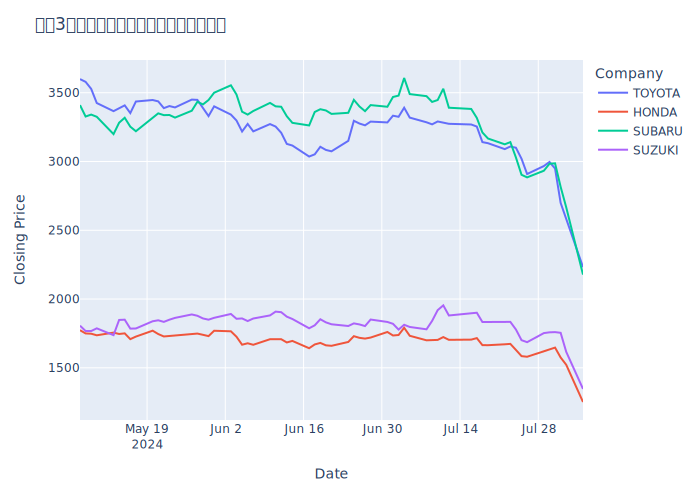

In [135]:
fig = px.line(data_frame=stock_df,x="Date",y="Close",color="Ticker",labels={"Ticker":"Company","Close":"Closing Price"})
fig.update_layout(title="過去3か月間の株式市場のパフォーマンス",font_family="Noto Sans JP, Meiryo, Arial",title_font_family="Noto Sans JP, Meiryo, Arial")
# fig.update_layout(
#     title="過去3か月間の株式市場のパフォーマンス",
#     font=dict(
#         family="Noto Sans JP, Meiryo, Arial"
#     )
# )
fig.show("svg")

In [119]:
stock_df["Ticker"].unique()

array(['TOYOTA', 'HONDA', 'SUBARU', 'SUZUKI'], dtype=object)

#### <b> 上記のグラフから、（トヨタとスバル）と（スズキとホンダ）の終値が比較的近いことがわかります。 </b>

#### <b> ファセット面グラフを作成して、様々な企業の業績を比較し、株価の動きの類似点や相違点を特定しましょう。</b>

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



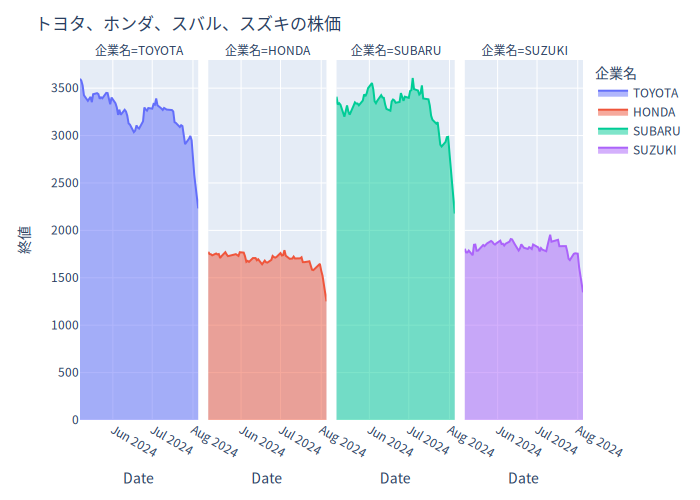

In [120]:
fig = px.area(data_frame=stock_df,x="Date",y="Close",color="Ticker",
        facet_col="Ticker",labels={"Close":"終値","Ticker":"企業名"}
        )

fig.update_layout(title="トヨタ、ホンダ、スバル、スズキの株価",font_family="Noto Sans CJK JP",title_font_family="Noto Sans CJK JP")
fig.show("svg")

## 3. 移動平均の分析

<b>単純移動平均 (SMA):</b> SMA は、特定の期間 (例：10 日間または 20 日間など) にわたる株価の平均を取ることによって計算されます。これは、価格データを平滑化して、時間の経過に伴う傾向を識別するのに役立ちます。

<b>
目</b>的: 移動平均は、投資家が傾向の方向を特定し、潜在的な買い/売りポイントを知らせ、サポート/レジスタンス レベルを提供するのに役立ちます。

In [121]:
#pd.set_option("display.max_rows", None)

In [122]:
ma_num = [10,20]

for num in ma_num:
    stock_df["MA_"+str(num)] = stock_df.groupby("Ticker")["Close"].rolling(window=num).mean().reset_index(level=0,drop=True)

10日および20日間の移動平均を計算するために、<b>pandas</b>の<b>rolling</b>関数を使用して、<b>window</b>の値（10と20）で平均を求めます。

その結果、2階層のindexが生成されるため、Dataframeに適合させるためにindexをリセットする必要があります。me

In [123]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN


D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



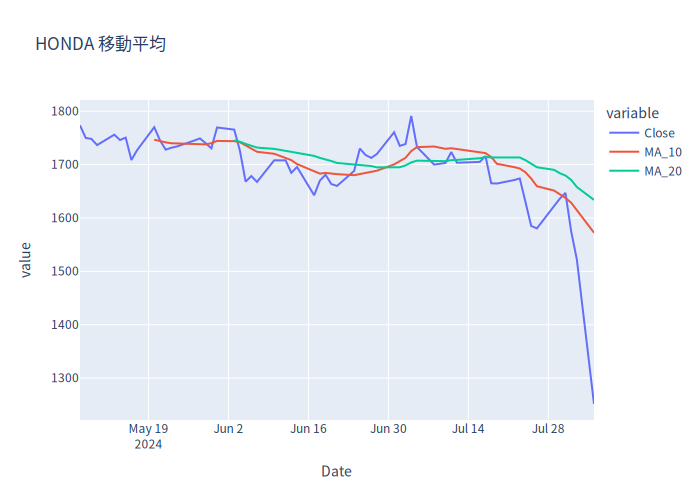

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



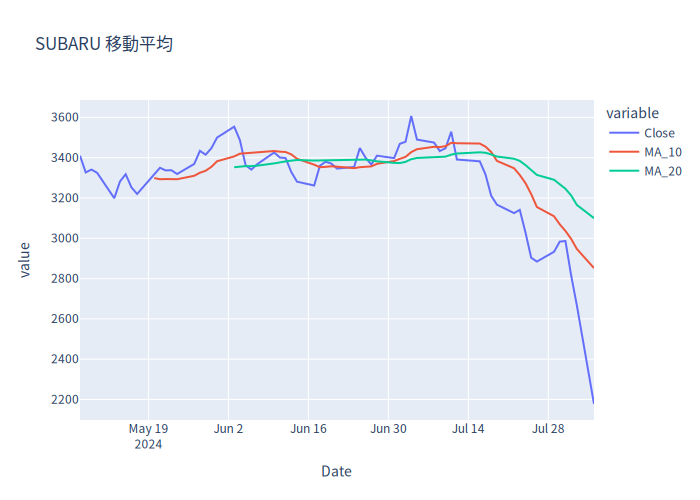

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



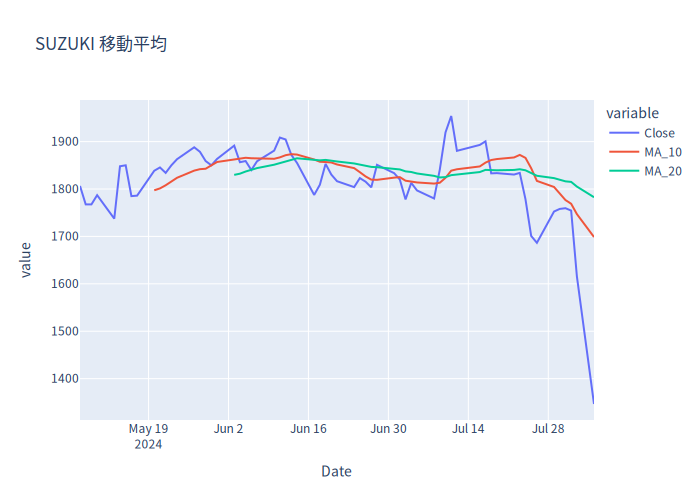

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



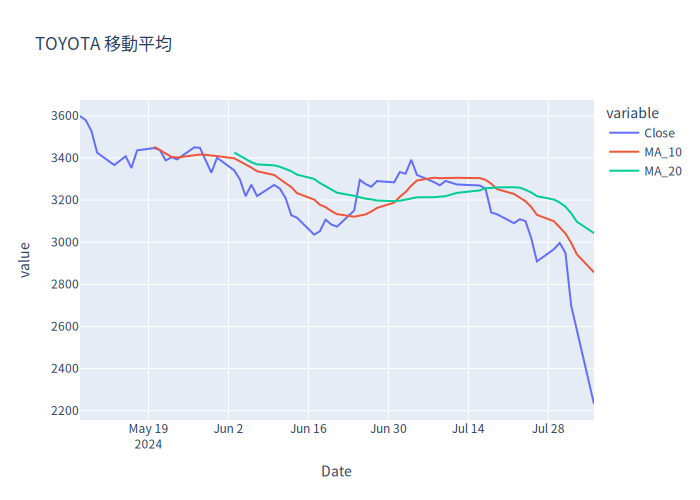

In [124]:
for ticker, group in stock_df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA_10', 'MA_20'], 
                  title=f"{ticker} 移動平均")
    fig.update_layout(font_family="Noto Sans CJK JP",title_font_family="Noto Sans CJK JP")
    fig.show("svg")

#### <b> 結果には、各企業ごとの4つのグラフが表示されます。移動平均（MA）の交差点は、投資家にとって重要なシグナルを提供します。</b>

MA10がMA20を上回る場合：これは Bullish signal（ブルシグナル - 強気のシグナル）であり、株価が上昇し続ける可能性があることを示しています。

MA10がMA20を下回る場合：これは Bearish signal（ベアシグナル - 弱気のシグナル）であり、株価が下落し続ける可能性があることを示しています。


#### <b> 上記のグラフから、以下のことが分かります：</b>

移動平均10日（MA10）が移動平均20日（MA20）を下回っている：すべての株式（トヨタ、スバル、など）でMA10がMA20より下に位置していることが確認できます。

<b> つまり、4つの企業の短期的な株価予測は弱気(Bearish)であることを意味します。</b>

## 4. ボラティリティ分析

ボラティリティは、株価や市場が特定の期間内にどれだけ頻繁に、またどれだけ大きく変動するかを示す指標です。ボラティリティは、価格の変動幅や頻度を評価することで、リスクを測定するのに役立ちます。

<b>標準偏差:</b>
標準偏差は、株価が平均値からどれだけ散らばっているかを測定する指標です。標準偏差が高い場合は、ボラティリティが高いことを示します。

<b>目的:</b>
ボラティリティを理解することで、投資家はリスクを評価し、より良い取引の意思決定を行い、ポートフォリオの配分を最適化することができます。

In [125]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN


In [126]:
#print(stock_df.groupby("Ticker")["Close"].pct_change().rolling(window=10).std())

In [127]:
stock_df["Volatility"] = stock_df.groupby("Ticker")["Close"].pct_change().rolling(window=10).std().reset_index(level=0,drop=True)

In [128]:
stock_df.head(30)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,Volatility
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN,NaN
5,TOYOTA,2024-05-14,3350.0,3434.0,3349.0,3389.0,3389.0,31178100,NaN,NaN,NaN
6,TOYOTA,2024-05-15,3409.0,3457.0,3405.0,3408.0,3408.0,23592600,NaN,NaN,NaN
7,TOYOTA,2024-05-16,3405.0,3407.0,3319.0,3352.0,3352.0,29023000,NaN,NaN,NaN
8,TOYOTA,2024-05-17,3367.0,3438.0,3353.0,3436.0,3436.0,22329600,NaN,NaN,NaN
9,TOYOTA,2024-05-20,3438.0,3478.0,3417.0,3447.0,3447.0,23715900,3452.9,NaN,NaN


D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



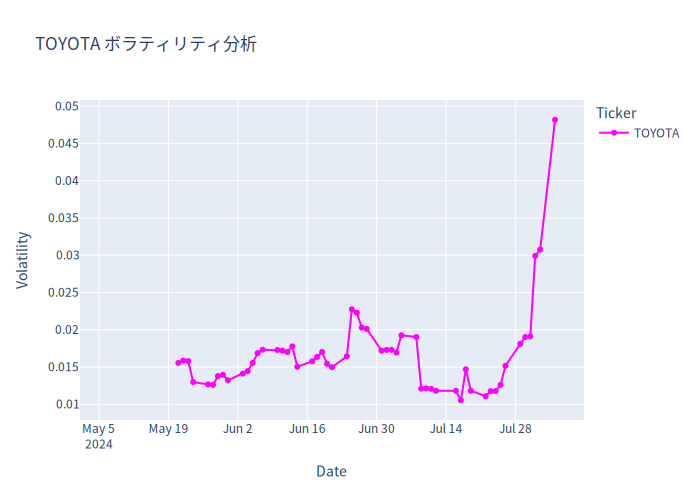

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



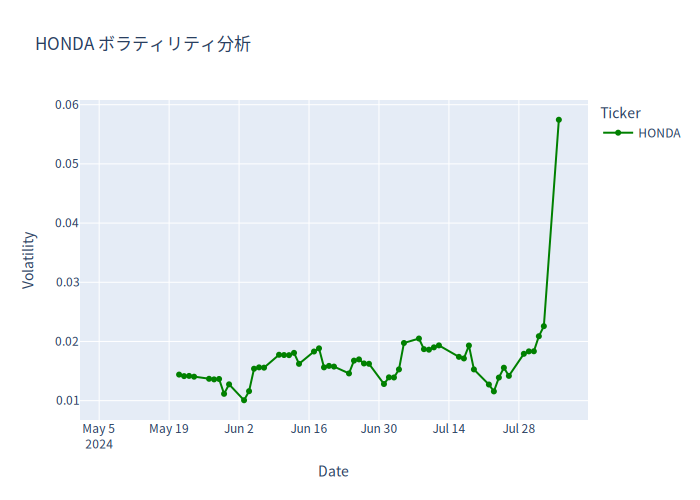

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



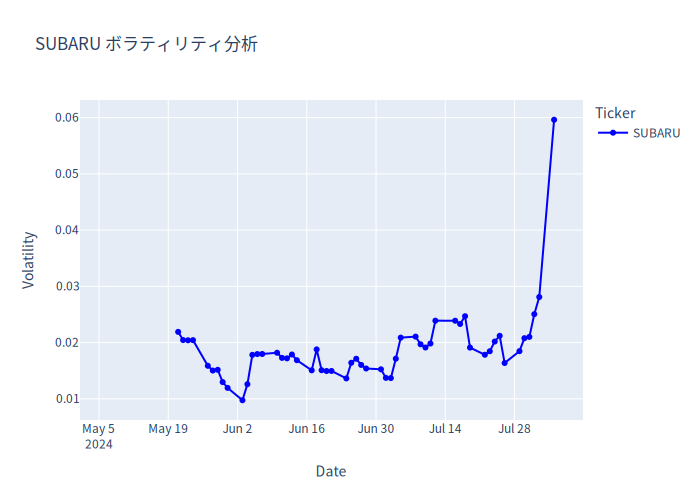

D:\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



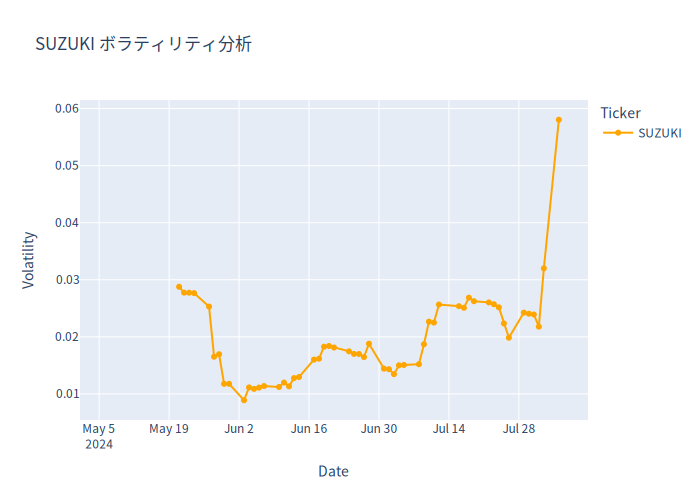

In [129]:
colors=["Magenta","Green","Blue","Orange"]
counter = 0
for cols in stock_code.values():
    vol_df = stock_df[stock_df["Ticker"]==cols]
    fig = px.line(data_frame=vol_df,x="Date",y="Volatility",color="Ticker"
                 ,title=f"{cols} ボラティリティ分析",markers=True,color_discrete_sequence=[colors[counter]])
    counter += 1
    fig.update_layout(font_family="Noto Sans CJK JP",title_font_family="Noto Sans CJK JP")
    fig.show("svg")

高いボラティリティは、株式や市場が大きな価格変動や頻繁な価格変動を経験していることを示し、一方、低いボラティリティは、市場が小さな価格変動や少ない頻度の価格変動を経験していることを示します。

#### <b>上記のボラティリティ分析のグラフから、4つの株式が高いボラティリティを示していることがわかります。これは、株式が近い将来に頻繁な価格変動を経験する可能性が高いことを意味します。</b>

## 5. 相関分析

<b>ピアソン相関係数 (Pearson Correlation Coefficient):</b>
ピアソン相関係数は、2つの株式間の線形関係を示す統計的な指標です。値は -1 から 1 の範囲で、以下のように解釈されます：

* 1：完全な正の相関（2つの株式が同じ方向に動く）
* -1：完全な負の相関（2つの株式が逆方向に動く）
* 0：相関がない（2つの株式の動きに関係がない）

<b>目的:</b><br>
相関分析は、異なる株式がどのように連動して動くかを理解するのに役立ち、リスク管理やポートフォリオの最適化に貢献します。

In [130]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,Volatility
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN,NaN


In [131]:
corr_df = pd.DataFrame()

for cols in stock_code.values():
    temp_df = pd.DataFrame()
    temp_df[str(cols)+"_Close"] = stock_df[stock_df["Ticker"]==cols]["Close"]
    temp_df = temp_df.reset_index(drop=True)
    corr_df = pd.concat([corr_df,temp_df],axis=1)

corr_df.head()

,TOYOTA_Close,HONDA_Close,SUBARU_Close,SUZUKI_Close
0,3599.0,1773.5,3410.0,1806.5
1,3579.0,1750.0,3327.0,1767.5
2,3528.0,1748.0,3341.0,1767.5
3,3425.0,1736.5,3325.0,1787.0
4,3366.0,1756.0,3199.0,1737.5


#### Pandasのデフォルトの相関方法はピアソン相関です

In [132]:
corr_values = corr_df.corr()
corr_values

,TOYOTA_Close,HONDA_Close,SUBARU_Close,SUZUKI_Close
TOYOTA_Close,1.000000,0.931049,0.820223,0.665905
HONDA_Close,0.931049,1.000000,0.884775,0.782247
SUBARU_Close,0.820223,0.884775,1.000000,0.827131
SUZUKI_Close,0.665905,0.782247,0.827131,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'TOYOTA_Close'),
  Text(0, 1.5, 'HONDA_Close'),
  Text(0, 2.5, 'SUBARU_Close'),
  Text(0, 3.5, 'SUZUKI_Close')])

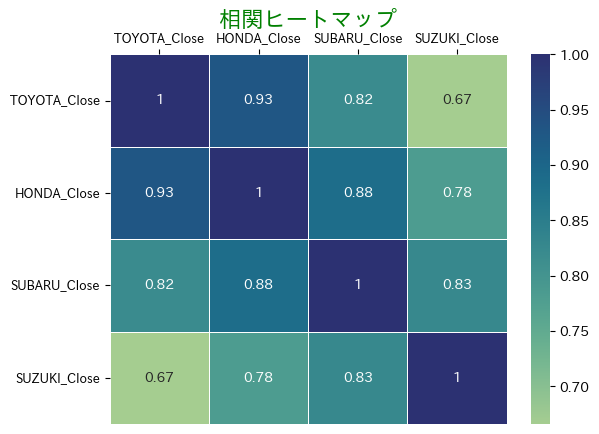

In [133]:
color = sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(data=corr_values,annot=True,cmap=color,linewidths=.7)
ax.set(xlabel = "",ylabel="")
ax.xaxis.tick_top()
ax.set_title('相関ヒートマップ', fontdict={'fontsize':16,"color":"Green"}, pad=20)
plt.xticks(fontsize=9,rotation=0)
plt.yticks(fontsize=9,rotation=0)
# ,"font-family":"Noto Sans CJK JP"
# fig.update_layout(font_family="Noto Sans CJK JP",title_font_family="Noto Sans CJK JP")

#### <b>上記の相関ヒートマップから、以下のことがわかります：</b>

トヨタとホンダ、および スバルとホンダ の間には直接的な相関関係があります。
* トヨタの株価が上昇すると、ホンダの株価も上昇します。
* ホンダの株価が上昇すると、スバルの株価も上昇します。